In [1]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [0]
y = [0.5]

In [3]:
t = [0]
dt = 1e-3
t_end = 1000
for t_now in tqdm.tqdm(np.arange(dt, t_end + dt, dt)):
    x.append(x[-1] + dt * (-y[-1] + x[-1] * (1 - (x[-1] ** 2 + y[-1] ** 2) ** 0.5)))
    y.append(y[-1] + dt * (x[-1] + y[-1] * (1 - (x[-1] ** 2 + y[-1] ** 2) ** 0.5)))
    t.append(t_now)

100%|██████████| 1000000/1000000 [00:00<00:00, 1657089.51it/s]


In [4]:
x1, y1 = x, y

In [5]:
x = [0]
y = [1.5]

In [6]:
t = [0]
dt = 1e-3
t_end = 10000
for t_now in tqdm.tqdm(np.arange(dt, t_end + dt, dt)):
    x.append(x[-1] + dt * (-y[-1] + x[-1] * (1 - (x[-1] ** 2 + y[-1] ** 2) ** 0.5)))
    y.append(y[-1] + dt * (x[-1] + y[-1] * (1 - (x[-1] ** 2 + y[-1] ** 2) ** 0.5)))
    t.append(t_now)

100%|██████████| 10000000/10000000 [00:05<00:00, 1712866.61it/s]


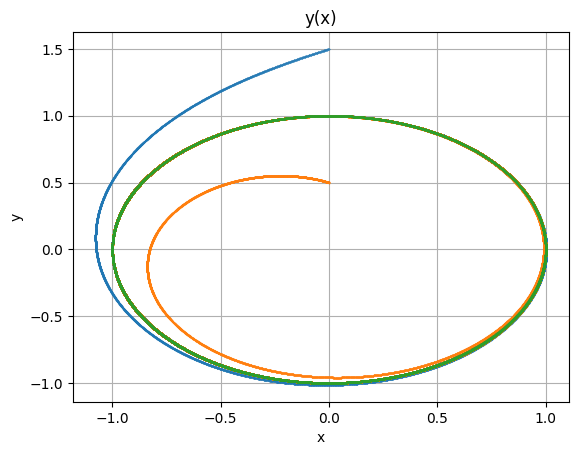

In [7]:
plt.plot(x, y, linestyle='', marker='.', markersize=0.5)
plt.plot(x1, y1, linestyle='', marker='.', markersize=0.5)
plt.plot(x[-10000:], y[-10000:], linestyle='', marker='.', markersize=0.75)
plt.title('y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [8]:
x_st = 0
y_st = 1

In [9]:
def find_next_ksi(ksi):
    global dt
    x = [x_st, x_st]
    y = [ksi, ksi]
    while not (x[-2] > x_st and x[-1] <= x_st):
        x.append(x[-1] + dt * (-y[-1] + x[-1] * (1 - (x[-1] ** 2 + y[-1] ** 2) ** 0.5)))
        y.append(y[-1] + dt * (x[-1] + y[-1] * (1 - (x[-1] ** 2 + y[-1] ** 2) ** 0.5)))
    return y[-1]

In [10]:
dots_ksi = []
dots_phi_ksi = []
for ksi in tqdm.tqdm(np.arange(y_st - 0.5, y_st + 0.5 + 1e-3, 1e-3)):
    if ksi == y_st: pass
    dots_ksi.append(ksi)
    dots_phi_ksi.append(find_next_ksi(ksi))

100%|██████████| 1001/1001 [00:04<00:00, 204.05it/s]


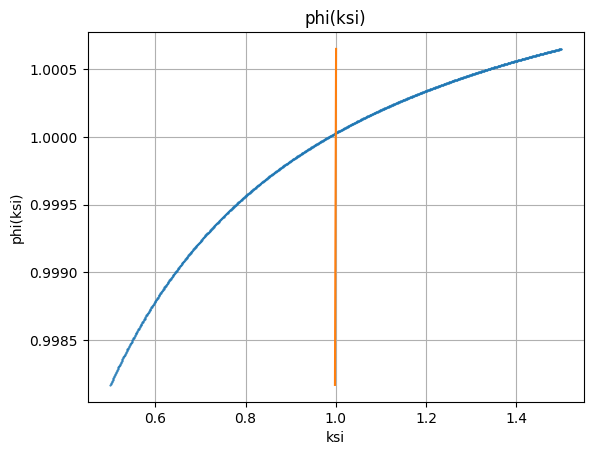

In [11]:
plt.plot(dots_ksi, dots_phi_ksi, linestyle='', marker='.', markersize=1)
plt.plot([np.amin(dots_phi_ksi), np.amax(dots_phi_ksi)], [np.amin(dots_phi_ksi), np.amax(dots_phi_ksi)])
plt.title('phi(ksi)')
plt.xlabel('ksi')
plt.ylabel('phi(ksi)')
plt.grid()

In [12]:
dots_ksi = [0.5]
dots_phi_ksi = [find_next_ksi(0.5)]
for i in tqdm.tqdm(range(100)):
    dots_ksi.append(dots_phi_ksi[-1])
    dots_phi_ksi.append(find_next_ksi(dots_ksi[-1]))

100%|██████████| 100/100 [00:00<00:00, 432.21it/s]


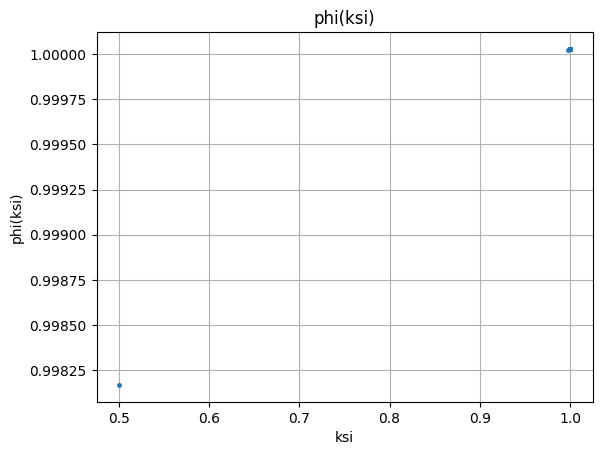

In [13]:
plt.plot(dots_ksi, dots_phi_ksi, linestyle='', marker='.', markersize=5)
plt.title('phi(ksi)')
plt.xlabel('ksi')
plt.ylabel('phi(ksi)')
plt.grid()

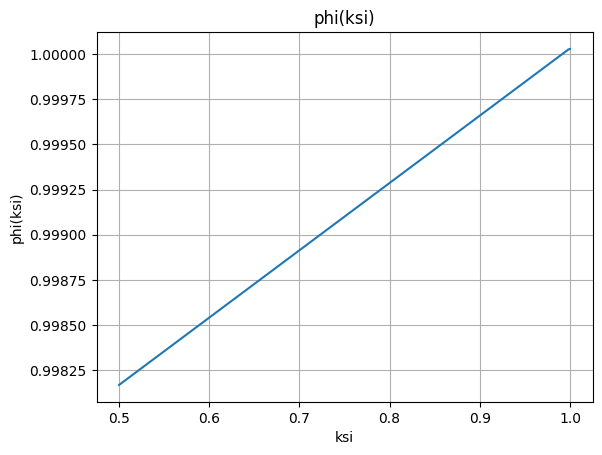

In [14]:
plt.plot(dots_ksi, dots_phi_ksi, linestyle='-')
plt.title('phi(ksi)')
plt.xlabel('ksi')
plt.ylabel('phi(ksi)')
plt.grid()

In [15]:
dots_ksi = [1.5]
dots_phi_ksi = [find_next_ksi(1.5)]
for i in tqdm.tqdm(range(100)):
    dots_ksi.append(dots_phi_ksi[-1])
    dots_phi_ksi.append(find_next_ksi(dots_ksi[-1]))

100%|██████████| 100/100 [00:00<00:00, 435.16it/s]


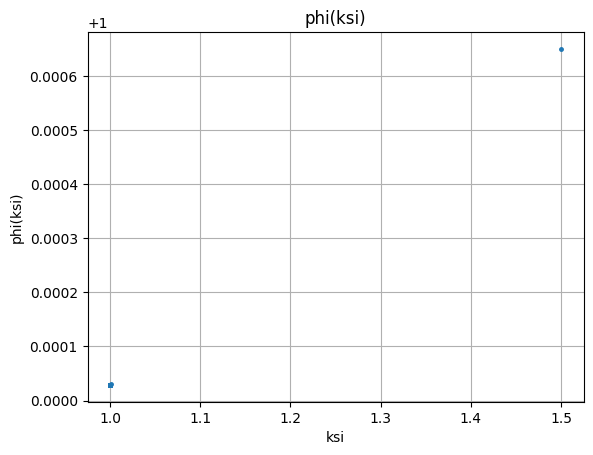

In [16]:
plt.plot(dots_ksi, dots_phi_ksi, linestyle='', marker='.', markersize=5)
plt.title('phi(ksi)')
plt.xlabel('ksi')
plt.ylabel('phi(ksi)')
plt.grid()

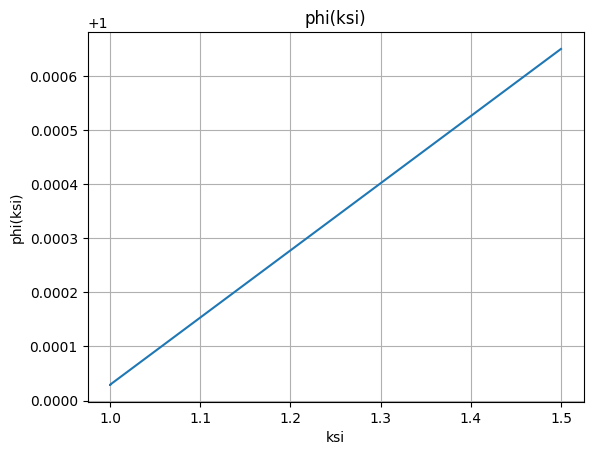

In [17]:
plt.plot(dots_ksi, dots_phi_ksi, linestyle='-')
plt.title('phi(ksi)')
plt.xlabel('ksi')
plt.ylabel('phi(ksi)')
plt.grid()